# Analysis 2
Analysis of the 'listings.csv' file for Boston Airbnb data for the following information:
1. Increase in the poularity of Airbnb, based on addition of new hosts.
2. Number of apartments listed at the different prices.
3. Number of reviews based on the listing price.
4. Variations in Price based on Apartment Type

'listings.csv' contains complete detailed information on every listing ID.

Packages used are:
numpy, pandas, matplotlib, seaborn

In [1]:
# Cell contains import statements etc. for analysis
import numpy as np
import pandas as pd
import os
os.chdir('..')
os.chdir('..') # Setting root directory
cwd = os.getcwd()

import matplotlib.pyplot as plt
import seaborn as sns

# Plots the figures in same place instead of a new window
%matplotlib inline

In [2]:
# Create DFs for holding 'listings.csv' data
listingsData = pd.read_csv(cwd+"//"+"Data//Boston//listings.csv")
listingsData.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


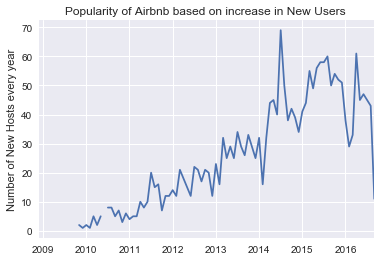

In [3]:
# Part I: Increase in popularity of Airbnb app in Boston city

# Converting string to datetime format
listingsData['host_since'] = pd.to_datetime(listingsData['host_since'])

# Finding unique hosts who joined Airbnb based on 'host_since' and 'join_date' and appending to newDF
newDF = {}
hosts = listingsData.groupby('host_id')
for level,value in hosts:
    host_since = value['host_since'].values[0]
    if host_since in newDF:
        newDF[host_since] += 1
    else:
        newDF[host_since] = 1

join_dates = pd.Series(newDF)
join_dates = join_dates.drop(join_dates.index[[0]])

# For better visualization, aggregate time series per month, to get no. of new users for every month
join_dates = join_dates.resample("M").sum()
join_dates.plot()
plt.ylabel('Number of New Hosts every year')
plt.title('Popularity of Airbnb based on increase in New Users ')

plt.savefig(cwd+"//analysis//analysis-2//Output1.jpg", dpi=1200) # Saving image in Outputs
plt.show()

# Part I Conclusion:
As we can see, the number of new hosts has increased drastically over the years of 2014-2016, with maximum users joining Airbnb in mid 2014. 

In [4]:
# Part II: Price Distribution

# Replacing ',' in price with '.'
if listingsData.price.dtype != np.float64:
    listingsData.price= listingsData.price.map(lambda p : float(p[1:-3].replace(',','')))

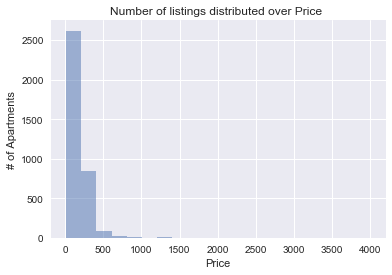

In [5]:
#Plotting our analysis

#PLotting a histogram showing the number of listings vs price
pricePlot= listingsData.price.dropna()
plt.hist(pricePlot, bins=20, alpha=0.5)
plt.xlabel('Price')
plt.ylabel('# of Apartments')
plt.title('Number of listings distributed over Price ')

plt.savefig(cwd+"//analysis//analysis-2//Output2.jpg", dpi=1200) # Saving image in Outputs
plt.show()

# Part II Conclusion:
- As we can see, there are more than 2500 listings at price range of 0-200 dollars while the number of apartments listed above 500 dollars is very less.
- This strongly supports the idea of Airbnb which is focused on providing affordable housing for travelers.

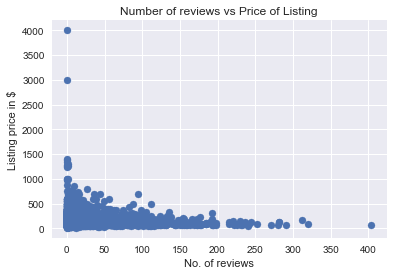

In [6]:
# Part III: Number of reviews vs price of the listings

# Plotting a scatter plot to display number of reviews based on the listing price
plt.scatter(listingsData['number_of_reviews'],listingsData['price'])
plt.ylabel('Listing price in $')
plt.xlabel('No. of reviews')
plt.title('Number of reviews vs Price of Listing')

plt.savefig(cwd+"//analysis//analysis-2//Output3.jpg", dpi=1200) # Saving image in Outputs
plt.show()

# Part III Conclusion:
- Above graph shows a scatter plot mapping the number of reviews for the listings vs their price
- We can see that affordable and economic apartment listings hav more number of reviews as compared to high-end expensive apartment listings.

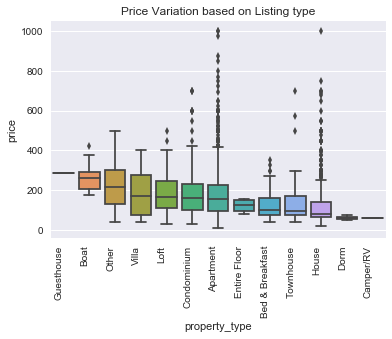

In [7]:
# Part IV: Variations in Price based on Apartment Type

# Defining sort order for plotting box plot by grouping data based on property_type and average prices
sortOrder = listingsData.groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index

# Plotting box plot to see prices for the different property types
# Using 'query' parameter to take listings having price lesser than 1000 to get a better plot
sns.boxplot(y='price', x='property_type', data=listingsData.query('price <= 1000'), order=sortOrder)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

plt.title('Price Variation based on Listing type')

plt.savefig(cwd+"//analysis//analysis-2//Output4.jpg", dpi=1200) # Saving image in Outputs
plt.show()

# Part IV: Conclusion:
- Above Box plot shows variation in prices based on the type of apartment.
- Box plot is more informative as it gives us the median/mean value, as well as the upper and lower whiskers (Scores outside the middle 50% values)
- Here, comparing on median values, we can see that fancy apartment tyes such as boats and villas are most expensive while dorms, townhouses and B&Bs are cheapest.